In [107]:
from numpy import eye, linalg, arange, sqrt, diag, sin, pi, linspace, heaviside, sum as npsum, multiply, conjugate, real, array, zeros, copy
import matplotlib.pyplot as plt

In [108]:
# funcaozinha para inserir o range do eixo x, autovalores, autovetores e o numero de energias desejado na visualização; possivel inserir potencial para plotar junto
def plotEnPsi_finite_diff(x_values, en, psi, n, scale,ymin,ymax, potential):
    plt.plot(x_values, potential, c="C1140")
    for j in range(n):
        plt.hlines(
            en[j],
            xmin=x_values[0],
            xmax=x_values[-1],
            colors="C" + str(j),
            linestyles="--",
        )
        plt.plot(x_values, en[j] + scale * psi[:, j],  c="C" + str(j))
        y_min, y_max = (ymin, ymax)
        plt.ylim(y_min, y_max)
    plt.show()

In [120]:
# PARAMETROS DO SISTEMA
h_bar=1 #planck reduzida
m = 0.067 #massa efetiva para GaAs na eq. de Schrödinger
L = 800  # tamanho do sistema
Ry = 26 #eV é a unidade de Energia
a0 = 0.05 #nm é a unidade de distância
h_bar2_m0 = Ry * a0**2
e2 = Ry * a0
k = 13 #constante dielétrica na eq. de Poisson
n2D = 5*10**(-5) #a.u. densidade experimentais

# parametros do poco (GaAs)
xmin_poco = 0.25 * L #a.u. parede do poço
xmax_poco = 0.75 * L #a.u. parede do poço
V_0_poco = 0.01 #a.u. profundidade do poço quadrado

# parametros do tempero
f = 0.1

# parâmetros de convergência
epsilon = 0.0001 

# dopagem (0 representa o fundo do poço)
mu = 0.1

# DISCRETIZAÇÃO E INTERVALO ABSCISSAS
N=1000 #Numero de pontos na rede
dx = L/(N+1)  # discretização> dx = L/N+1 => N = (L/dx) - 1
x = arange(0, N)*dx

# parametros iniciais no ciclo de autoconsistência
V_h_inicial = zeros(N)
n_3d_loop = zeros(N)

In [121]:
# LAPLACIANO 1D DISCRETIZADO
laplaciano = lambda dx,N: -(1 / (dx ** 2)) * (2 * eye(N) - eye(N, k=-1) - eye(N, k=1))
energia_cinetica = lambda m: -(0.5/m)*laplaciano(dx,N)

In [122]:
# DEFINIÇÃO DO POTENCIAL ESTRUTURAL
poco_quadrado_finito = (
    lambda profundidade, xmin, xmax, x: -profundidade
    * heaviside(  # somar profundidade apenas para deixar o fundo do poço = 0
        x - xmin, 1
    )
    * heaviside(xmax - x, 1)
    + profundidade
)   

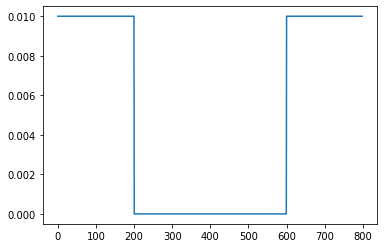

In [123]:
# POTENCIAIS
# scale = 2
V_poco_quadrado_finito = poco_quadrado_finito(
    profundidade=V_0_poco, xmin=xmin_poco, xmax=xmax_poco, x=x
)
V_hartree = lambda n_3d, k, dx, N: linalg.solve(laplaciano(dx, N), (-4*pi/k)*n_3d)
V_hartree_temperado = lambda tempero, V_1, V_3: f*V_3 + (1-f)*V_1
V_total = lambda V_estrutural, V_interacao: V_estrutural + V_interacao 
plt.plot(x, V_poco_quadrado_finito)
plt.show()


In [124]:
# E0_mu (soma de níveis ocupados)
E0_mu = lambda mu, E0_list: npsum(E0_list, where=E0_list<mu)
# Numero de níveis ocupados 
N_levels = lambda mu, E0_list: npsum(E0_list<mu)
# D.O.L 3D
def n_3d(phi_list, E0_list, mu, m): 
  vectors = array([(m*(mu-E0_list[j])/(2*pi*h_bar**2))*(conjugate(phi_list[j])*phi_list[j]) for j in range(N_levels(mu, E0_list))])
  if N_levels(mu, E0_list) > 1:
    return npsum(vectors, axis=0)
  elif N_levels(mu, E0_list) == 1:
    return vectors[0]
  return zeros(N)
# D.O.L 2D
n_2d_params = lambda mu, m, E0_list: [npsum(E0_list<mu)*m/(2*pi*h_bar**2),-E0_mu(mu, E0_list)] #retorna os coeficientes linear e angular, n_2d_params[0]==a e n_2d_params[1]==b

In [125]:
# O HAMILTONIANO
H = lambda V_efetivo, m: energia_cinetica(m) + diag(
    V_efetivo
)

Numero de niveis ocupados antes do loop 28
Energias ocupadas antes do loop [0.00035644 0.00141918 0.00316516 0.0055396  0.00838743 0.0109164
 0.01180885 0.01288287 0.01529015 0.01716735 0.01913543 0.02208193
 0.025046   0.02777104 0.03108738 0.03494319 0.03864632 0.04242178
 0.04680138 0.05148643 0.05606443 0.06086224 0.066199   0.07173845
 0.07723542 0.08301839 0.0892782  0.09569535]


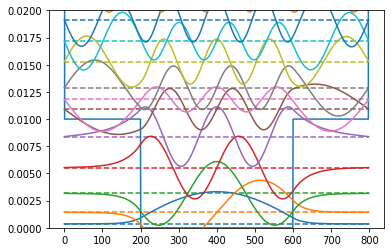

iter= 1
Numero de niveis ocupados 6
Energias ocupadas [0.04551013 0.04554698 0.06995089 0.06996047 0.088677   0.08868204]
iter= 2
Numero de niveis ocupados 6
Energias ocupadas [0.04513405 0.04521114 0.06940642 0.06945074 0.08803931 0.08806766]
iter= 3
Numero de niveis ocupados 6
Energias ocupadas [0.04483403 0.04494765 0.06898424 0.06906036 0.08755186 0.08761096]
iter= 4
Numero de niveis ocupados 6
Energias ocupadas [0.04459369 0.04474042 0.06865646 0.0687616  0.08718307 0.08727039]
iter= 5
Numero de niveis ocupados 6
Energias ocupadas [0.04440022 0.04457691 0.0684015  0.06853305 0.08690475 0.08701787]
iter= 6
Numero de niveis ocupados 6
Energias ocupadas [0.04424358 0.04444742 0.06820266 0.06835825 0.08669524 0.08683191]
iter= 7
Numero de niveis ocupados 6
Energias ocupadas [0.04411602 0.04434441 0.06804713 0.06822454 0.08653799 0.08669611]
iter= 8
Numero de niveis ocupados 6
Energias ocupadas [0.04401147 0.04426207 0.06792503 0.06812225 0.08642037 0.08659798]
iter= 9
Numero de niveis

In [126]:
# Primeira vez que foi executado o programa:
V_1 = V_h_inicial
V_3 = V_hartree(n_3d_loop, k, dx, N)
V_temperado = V_hartree_temperado(0, V_1, V_3)
V_efetivo = V_total(V_poco_quadrado_finito, V_temperado)
# acrescentando o potencial "infinito" nas bordas
V_efetivo[0] = 1000
V_efetivo[-1] = 1000
# diagonalização
E0_list, phi_list = linalg.eigh(H(V_efetivo,m))
N_ocupados = N_levels(mu, E0_list)
print("Numero de niveis ocupados antes do loop", N_ocupados)
print("Energias ocupadas antes do loop", E0_list[:N_ocupados])

# teste de consistência para ver as energias do poço
plotEnPsi_finite_diff(x, E0_list, phi_list, N_ocupados, 0.05,0, 0.02, V_efetivo)

n_3d_loop = n_3d(phi_list, E0_list, mu, m)
n_2d_loop = n_2d_params(mu, m, E0_list)
# print("formato n3d antes loop =>", n_3d_loop.shape)
# obtendo energias e estados
# E0, phi_list = linalg.eigh(H)

# Loop de autoconsistência:
convergiu = False
iteracao=1
while not convergiu:
  print("iter=", iteracao)
  V_3 = V_hartree(n_3d_loop, k, dx, N)
  V_temperado = V_hartree_temperado(f, V_temperado, V_3)
  V_efetivo = V_total(V_poco_quadrado_finito, V_temperado)
  # acrescentando o potencial "infinito" nas bordas
  V_efetivo[0] = 1000
  V_efetivo[-1] = 1000
  # diagonalização
  E0_list, phi_list = linalg.eigh(H(V_efetivo,m))
  N_ocupados = N_levels(mu, E0_list)
  print("Numero de niveis ocupados",N_ocupados)
  print("Energias ocupadas", E0_list[:N_ocupados])
  n_3d_loop_novo = n_3d(phi_list, E0_list, mu, m)
  # print("n_3d_loop_novo", n_3d_loop_novo)
  # n_3d_loop_novo = n_3d_loop_novo if n_3d_loop_novo.size != N else zeros(N)
  n_2d_loop_novo = n_2d_params(mu, m, E0_list)
  
  # teste convergencia
  if (abs((n_2d_loop_novo[0] - n_2d_loop[0])/n_2d_loop[0])<epsilon) and (abs((n_2d_loop_novo[1] - n_2d_loop[1])/n_2d_loop[1])<epsilon):
    # se convergiu
    print("convergiu!")
    convergiu=True
  else:
    # se nao convergiu
    # print("formato V_1 novo", V_1.shape)
    n_2d_loop = copy(n_2d_loop_novo)
    n_3d_loop = copy(n_3d_loop_novo)
    iteracao+=1

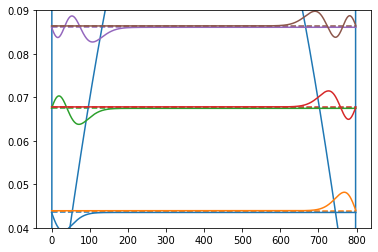

In [127]:
plotEnPsi_finite_diff(x, E0_list, phi_list, N_ocupados, 0.03, 0.04, 0.09, V_efetivo)

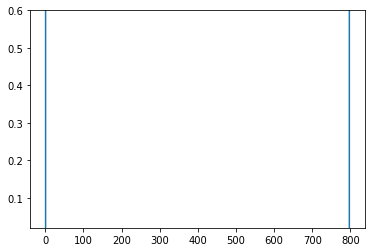

In [117]:
plt.plot(x, V_efetivo)
plt.ylim(0.02,0.6)
plt.show()